# Prosper Loans Data Exploration through Visualizations

## by Christopher Toromo

## Investigation Overview

The objective of the project is to conduct an exploratory data analysis on a Prosper Loan dataset. This is through the use of Python data science and data visualization libraries to explore the dataset’s variables and understand the data’s structure, oddities, patterns, and relationships.


## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 

The data set can be found [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv) and the variable descriptions 
can be found [here](https://docs.google.com/spreadsheets/u/0/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing).


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'

df = pd.read_csv(url)

## Bar charts for the IncomeRange variable and the LoanStatus variable

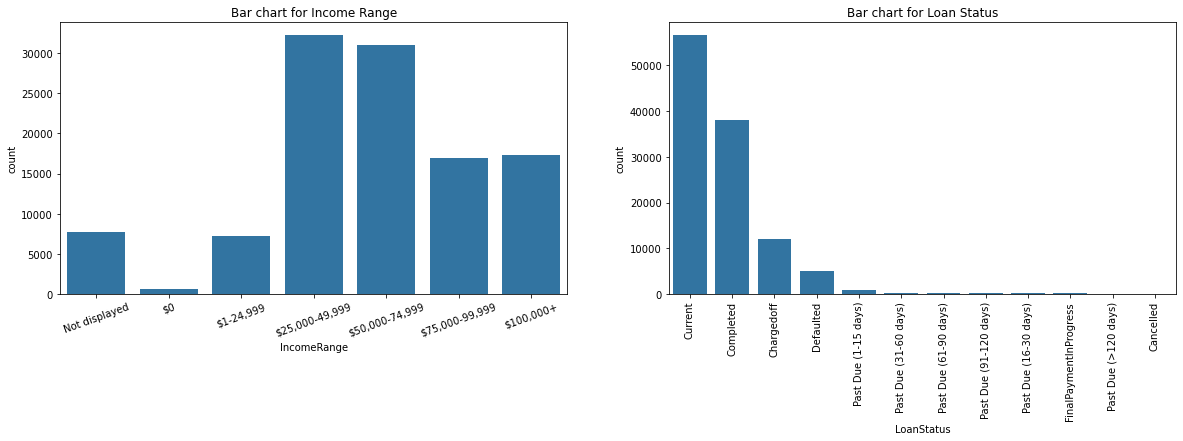

In [30]:
# Selecting the categorical columns for features that are of interest

plt.figure(figsize = [20, 5])
 
plt.subplot(1, 2, 1)

cat_col = ['ListingCategory (numeric)', 'EmploymentStatus', 'Occupation', 'IncomeRange', 'LoanStatus','BorrowerState']

categorical = df[cat_col]

# We shall order the income range from lowest to highest

income_order = ['Not displayed', '$0', '$1-24,999', '$25,000-49,999', 
                '$50,000-74,999', '$75,000-99,999', '$100,000+']

# Plotting the bar chart

sb.countplot(data = categorical, x = 'IncomeRange', color = sb.color_palette()[0],
             order=income_order)
plt.xticks(rotation = 20)
plt.title('Bar chart for Income Range');

plt.subplot(1, 2, 2)

sb.countplot(data = categorical, x = 'LoanStatus', color = sb.color_palette()[0],order=categorical['LoanStatus'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Bar chart for Loan Status');


**From the above observation, we can easily tell that people on mid-range salary levels are the ones requesting most loans and that the most loans are still active.**

# Histogram for the EstimatedLoss variable and EstimatedReturn variable and Average Credit Score

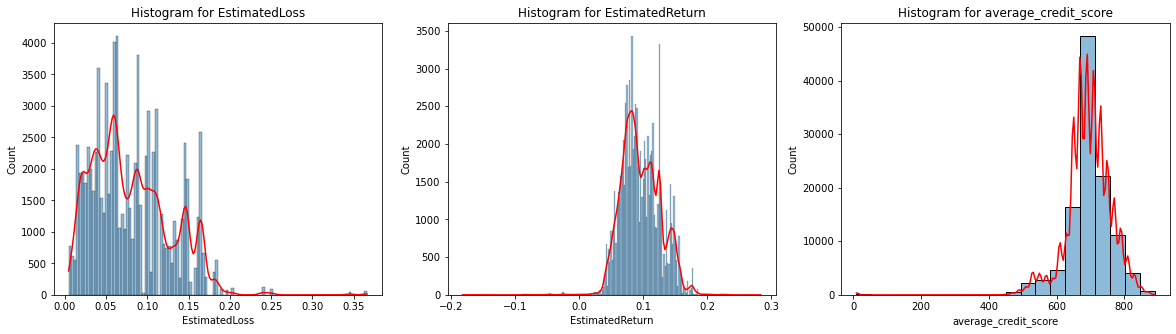

In [32]:
# Selecting the numeric columns for features that are of interest

numeric_col = ['Term','BorrowerAPR','BorrowerRate','EstimatedLoss','EstimatedReturn',
               'EmploymentStatusDuration','CreditScoreRangeLower','CreditScoreRangeUpper']

numeric = df[numeric_col]
numeric.head()

plt.figure(figsize = [20, 5])

plt.subplot(1, 3, 1)

ax = sb.histplot(data = numeric, x = 'EstimatedLoss', kde=True)
ax.lines[0].set_color('red')
plt.title('Histogram for EstimatedLoss');


plt.subplot(1, 3, 2)

ax1 = sb.histplot(data = numeric, x = 'EstimatedReturn', kde=True)
ax1.lines[0].set_color('red')
plt.title('Histogram for EstimatedReturn');

plt.subplot(1, 3, 3)

ax = sb.histplot(data = df, x = 'average_credit_score', kde=True, bins=20)
ax.lines[0].set_color('red')
plt.title('Histogram for average_credit_score');

**From the above, the distribution of the Estimated loss is skewed to the right, while the Estimated return variable is slightly symmetrical. Also most loans are requested by people with a credit score of 700. Also the credit score rating is skewed to the left.**

# Scatter plots for the BorrowerAPR and average_credit_score vs BorrowerRate and  variables


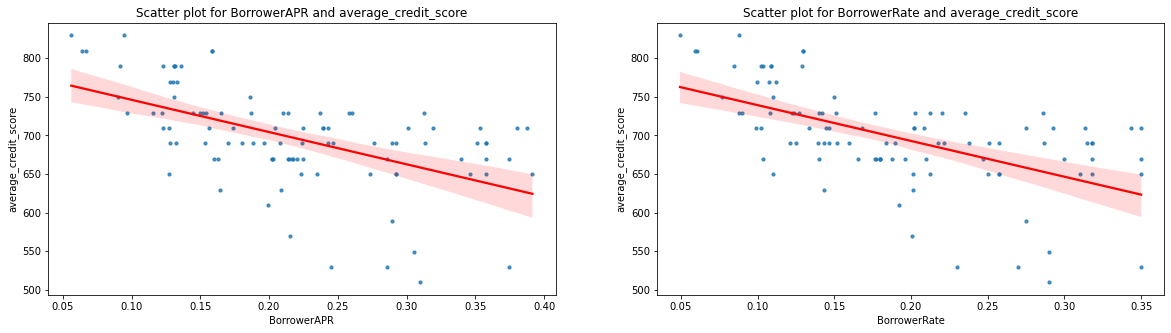

In [14]:
# We shall create a new column of the average credit score

df['average_credit_score'] = (df['CreditScoreRangeLower'] + df['CreditScoreRangeUpper'])/2

df.average_credit_score.head()

# We shall sample the data to avoid overplotting

np.random.seed(1)
sample = np.random.choice(df.shape[0], 100, replace=False)
loan_samp = df.loc[sample]
loan_samp


plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)

sb.regplot(data = loan_samp, x = 'BorrowerAPR', y = 'average_credit_score', scatter_kws={'s':10}, 
           line_kws={'color':'red'})
plt.title('Scatter plot for BorrowerAPR and average_credit_score')
plt.xlabel('BorrowerAPR')
plt.ylabel('average_credit_score');

plt.subplot(1, 2, 2)

sb.regplot(data = loan_samp, x = 'BorrowerRate', y = 'average_credit_score', scatter_kws={'s':10}, 
           line_kws={'color':'red'})
plt.title('Scatter plot for BorrowerRate and average_credit_score')
plt.xlabel('BorrowerRate')
plt.ylabel('average_credit_score');

**From the above we can tell from the above that the higher the credit score of a person, the lower the interest rate on the loan.**

# Clustered bar chart for the Income Range, Employment status respectively and IsBorrowerHomeowner variables

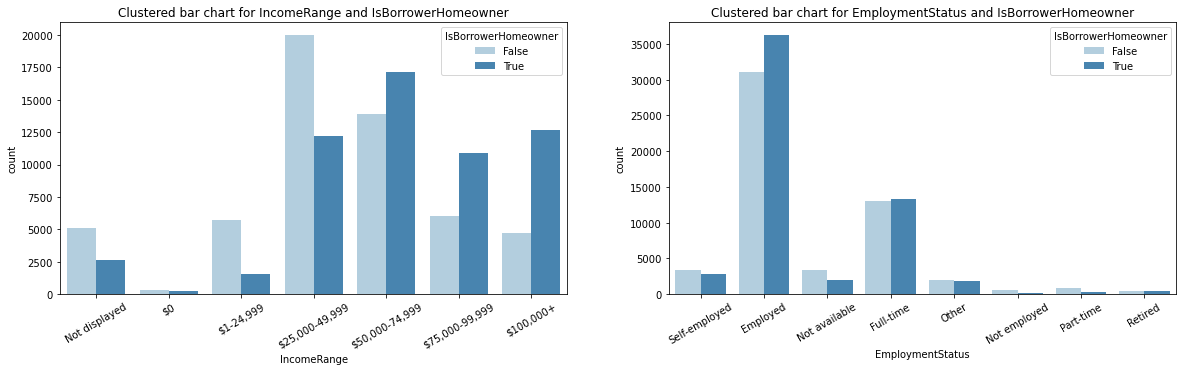

In [34]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)

sb.countplot(data = df, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', palette = 'Blues',
             order=income_order)
plt.xticks(rotation = 30)
plt.title('Clustered bar chart for IncomeRange and IsBorrowerHomeowner');

plt.subplot(1, 2, 2)

sb.countplot(data = df, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner', palette = 'Blues')
plt.xticks(rotation = 30)
plt.title('Clustered bar chart for EmploymentStatus and IsBorrowerHomeowner');

**From the above, we can also see that most people with higher income levels (i.e $50000 and above) are also homeowners. Also most employed people requesting for the loan are also homeowners.**

# Violin plot and box plot for the IncomeRange and LoanStatus variables

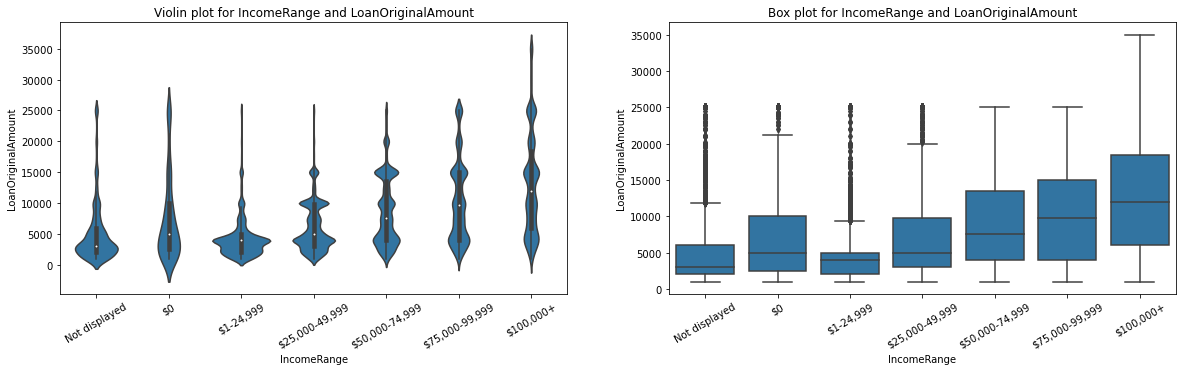

In [19]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)

sb.violinplot(data = df, x = 'IncomeRange', y = 'LoanOriginalAmount', color = sb.color_palette()[0],
              order=income_order)
plt.xticks(rotation = 30)
plt.title('Violin plot for IncomeRange and LoanOriginalAmount');

plt.subplot(1, 2, 2)

sb.boxplot(data = df, x = 'IncomeRange', y = 'LoanOriginalAmount', color = sb.color_palette()[0],
           order=income_order)
plt.xticks(rotation = 30)
plt.title('Box plot for IncomeRange and LoanOriginalAmount');

**From the above, we can tell that original loan amount tend to rise with the increase in the Income Range. The highest income range bracket contains the most diverse request amounts of the original loan amount.**

# Heatmap for the correlation between the numeric variables

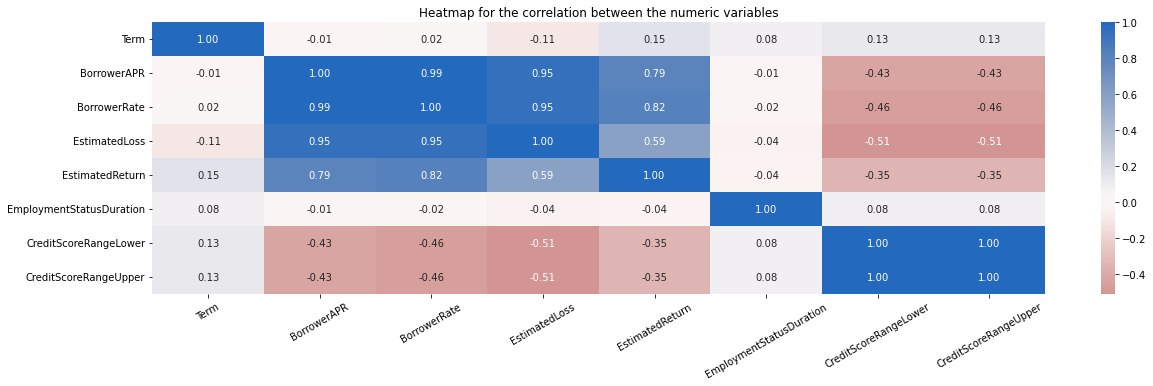

In [36]:
plt.figure(figsize = [20, 5])

sb.heatmap(numeric.corr(), annot = True, fmt = '.2f',
           cmap='vlag_r', center=0)
plt.title('Heatmap for the correlation between the numeric variables')
plt.xticks(rotation = 30);

**We can see that the BorrowerAPR and the BorrowerRate are highly correlated. Also the EstimatedLoss and the EstimatedReturn are highly correlated.**

In [45]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt --SlidesExporter.reveal_scroll=True

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 899813 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\HP\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\HP\ana